In [1]:
# BASIC CLUSTERING EXAMPLE:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

In [2]:
# Dataset is Heart Disease data

df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)

# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Cleaning Data

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


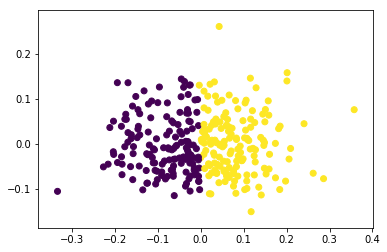

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  65
1      55  99


In [3]:
# (1) Normalize and 
# (2) reduce data to desired number of feature-dimensions via PCA.

X_norm = normalize(X)
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y)) # pandas version of confusion_matrix


In [4]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

Comparing k-means and mini batch k-means solutions:
col_0    0    1
row_0          
0        0  140
1      149   14


# Goal: 
Play around with the K to increase accuracy. What is the best solution to achieve this increased accuracy? Take note of computational overhead too.

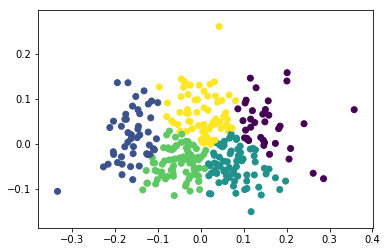

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      15  21
1      36  12
2      14  58
3      34  45
4      40  28


In [17]:
# adjusting K to 5
y_pred2 = KMeans(n_clusters=5, random_state=42).fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred2)
plt.show()

print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred2, y)) # pandas version of confusion_matrix

In [6]:
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=5,
    batch_size=200, 
    random_state=42)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred2))

Comparing k-means and mini batch k-means solutions:
col_0   0   1   2   3   4
row_0                    
0       0   1   0   0  56
1       0  47   0   7   0
2       0   0   0  72   8
3      36   0   7   0   3
4       0   0  65   0   1


In [7]:
#adjusting batch size
minibatchkmeans2 = MiniBatchKMeans(
    init='random',
    n_clusters=5,
    batch_size=100, 
    random_state=42)
minibatchkmeans2.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini2 = minibatchkmeans2.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini2, y_pred2))

Comparing k-means and mini batch k-means solutions:
col_0   0   1   2   3   4
row_0                    
0      36   0   8   0  13
1       0  38   0  17   0
2       0  10   0   0  32
3       0   0  57   1   0
4       0   0   7  61  23


In [8]:
minibatchkmeans3 = MiniBatchKMeans(
    init='random',
    n_clusters=5,
    batch_size=50, 
    random_state=42)
minibatchkmeans3.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini3 = minibatchkmeans3.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini3, y_pred2))

Comparing k-means and mini batch k-means solutions:
col_0   0   1   2   3   4
row_0                    
0      28   0   4   0  10
1       0   3   0   9  53
2       0  45   0  32   0
3       0   0  37  38   5
4       8   0  31   0   0


In [9]:
minibatchkmeans4 = MiniBatchKMeans(
    init='random',
    n_clusters=5,
    batch_size=1000, 
    random_state=42)
minibatchkmeans4.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini4 = minibatchkmeans4.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini4, y_pred2))

Comparing k-means and mini batch k-means solutions:
col_0   0   1   2   3   4
row_0                    
0       0   1   0   0  58
1       0  47   0   4   0
2       0   0   0  75   4
3      36   0   8   0   1
4       0   0  64   0   5


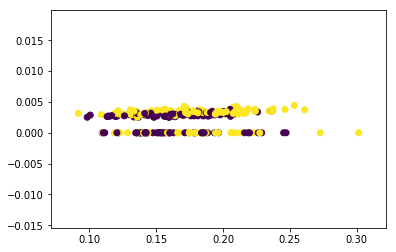

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  66
1      55  98


In [10]:
# trying without pca
y_pred = KMeans(n_clusters=2).fit_predict(X_norm)

# Plot the solution.
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y)) # pandas version of confusion_matrix

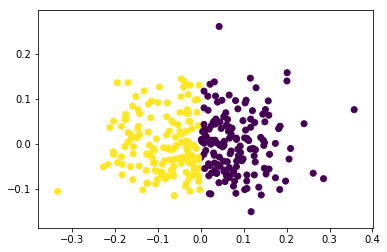

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      55  98
1      84  66


In [11]:
# trying without normalization
# trying without pca
y_pred = KMeans(n_clusters=2).fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

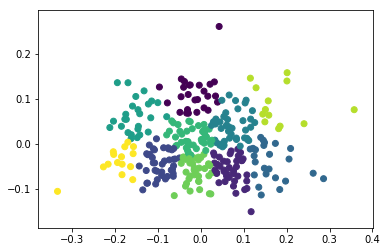

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      15  11
1       7  34
2      15  24
3       4  20
4      23  20
5      20   6
6      23  18
7      14  21
8       7   6
9      11   4


In [12]:
# adjusting K to 10
y_pred3 = KMeans(n_clusters=10, random_state=42).fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred3)
plt.show()

print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred3, y)) # pandas version of confusion_matrix

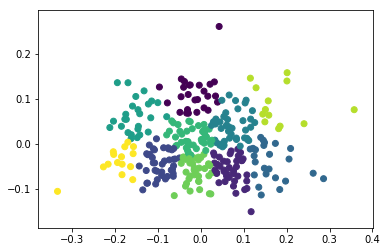

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      11  15
1      34   7
2      24  15
3      20   4
4      20  23
5       6  20
6      18  23
7      21  14
8       6   7
9       4  11


In [13]:
y2 = np.where(y > 0, 0, 1)
# adjusting K to 10
y_pred3 = KMeans(n_clusters=10, random_state=42).fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred3)
plt.show()

print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred3, y2)) # pandas version of confusion_matrix

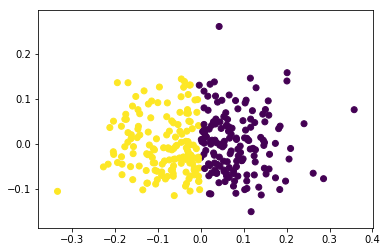

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      55  99
1      84  65


In [14]:
# Going to go back to original model, but adjusting other parameters
y_pred = KMeans(n_clusters=2, n_init=25, max_iter=4000, tol=1e-5).fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

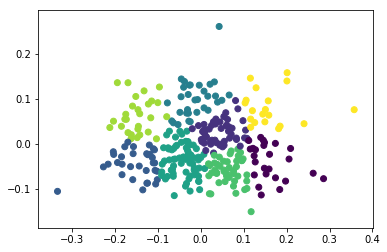

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0       5  20
1      23  28
2      18  15
3      20  12
4      32  37
5       8  38
6      22   6
7      11   8


In [15]:
# Doing one last adjustment: n_clusters default=8
y_pred = KMeans(n_init=25, max_iter=5000, tol=1e-6).fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

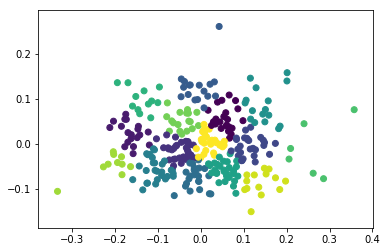

In [16]:
y_pred = KMeans(n_clusters=15, n_init=50, max_iter=10000, tol=1e-6).fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()